In [262]:
import pandas as pd
from collections import Counter
import math
import seaborn as sns

In [263]:
# read in the data and convert to json
df_art = pd.read_csv('articles.csv').dropna().reset_index(drop=True)
df_art.head()

,title,url,subreddit,text
0,Meta's threat to close down Facebook and Insta...,https://www.cityam.com/metas-threat-to-close-d...,nottheonion,Meta’s threat to close down Facebook and Insta...
1,Pregnant Texas woman driving in HOV lane told ...,https://www.chron.com/news/houston-texas/artic...,nottheonion,Is an unborn fetus a human being in the eyes o...
2,Mark Zuckerberg Says Meta Employees “Lovingly”...,https://consequence.net/2022/04/mark-zuckerber...,nottheonion,Mark Zuckerberg hasn’t always had a squeaky-cl...
3,Police didn't immediately confront the gunman ...,https://www.insider.com/texas-shooting-police-...,nottheonion,Law enforcement is getting slammed for its res...
4,Shaquille O'Neal says gorillas freak out when ...,https://www.insider.com/gorillas-afraid-of-sha...,nottheonion,Shaquille O'Neal says gorillas always freak ou...


In [264]:
stop_file = open("NLTK_English_stopwords.txt", "r")
stop_words = stop_file.read()
stop_words_list = stop_words.replace('\n', ' ').split(" ")
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [265]:
import nltk

df_art['text'] = df_art['text'].str.lower()
df_art['text'] = df_art['text'].str.replace('[^\w\s]', '')

for i in range(len(df_art['text'])):
    article = df_art['text'][i]
    if type(article) == float:
        continue
    word_tokens = nltk.word_tokenize(article)
    filtered = []
    for w in word_tokens:
        if w not in stop_words_list:
            filtered.append(w)
    df_art.at[i,'text'] = ' '.join(filtered)

df_art

<ipython-input-265-efeb1fcb5284>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_art['text'] = df_art['text'].str.replace('[^\w\s]', '')


,title,url,subreddit,text
0,Meta's threat to close down Facebook and Insta...,https://www.cityam.com/metas-threat-to-close-d...,nottheonion,metas threat close facebook instagram europe b...
1,Pregnant Texas woman driving in HOV lane told ...,https://www.chron.com/news/houston-texas/artic...,nottheonion,unborn fetus human eyes oftexas traffic laws p...
2,Mark Zuckerberg Says Meta Employees “Lovingly”...,https://consequence.net/2022/04/mark-zuckerber...,nottheonion,mark zuckerberg hasnt always squeakyclean repu...
3,Police didn't immediately confront the gunman ...,https://www.insider.com/texas-shooting-police-...,nottheonion,law enforcement getting slammed response uvald...
4,Shaquille O'Neal says gorillas freak out when ...,https://www.insider.com/gorillas-afraid-of-sha...,nottheonion,shaquille oneal says gorillas always freak nea...
...,...,...,...,...
1683,Elton John Awarded Medal By Joe Biden For Work...,https://www.theonion.com/elton-john-awarded-me...,TheOnion,president biden awarded sir elton john nationa...
1684,What Republicans Are Saying About The Paul Pel...,https://www.theonion.com/what-republicans-are-...,TheOnion,many innocent people die realize words matter ...
1685,What To Say To Someone Struggling With Inflation,https://www.theonion.com/what-to-say-to-someon...,TheOnion,may earn commission links page start slideshow...
1686,Herschel Walker Quietly Asking Around For D.C....,https://www.theonion.com/herschel-walker-quiet...,TheOnion,wrightsville gain display confidence ahead geo...


In [266]:
# setup data for vectorizer
data = df_art['text']
train_data = df_art[200:1300]
data_target = train_data['subreddit']


In [267]:
# preprocess text and tokenizing, link the index value of a word in the vocab
# to its frequency in teh whole training corpus
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data['text'])
X_train_counts.shape

(1100, 27124)

In [268]:
# divide the number of occurrences of each word by the total number of words 
# to avoid discrepancies in average count values between larger and smaller documents
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1100, 27124)

In [269]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, data_target)

def sk_predict_speaker(sentence):
    sentence_counts = count_vect.transform([sentence])
    sentence_tfidf = tfidf_transformer.transform(sentence_counts)
    prediction = clf.predict(sentence_tfidf)
    return prediction[0]

In [270]:
predictions = []
for article in df_art['text'].values.tolist():
    if type(article) == float:
        continue
    predictions.append(sk_predict_speaker(article))
predictions

['nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'TheOnion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',
 'nottheonion',


<AxesSubplot:>

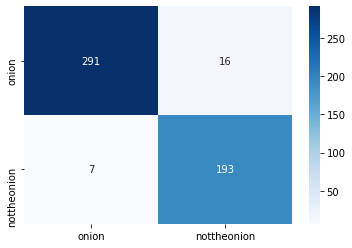

In [271]:
# test the function on the dataset and visualize the results
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_art[['text']], df_art['subreddit'], test_size=0.3)

# run the model and visualize the results
y_pred = X_test['text'].map(lambda x: sk_predict_speaker(x))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['onion', 'nottheonion'], yticklabels=['onion', 'nottheonion'])

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_pred=y_pred, y_true=y_test))
print('Precision:', precision_score(y_pred=y_pred, y_true=y_test,average='weighted'))
print('Recall:', recall_score(y_pred=y_pred, y_true=y_test,average='weighted'))
print('f1-score:', f1_score(y_pred=y_pred, y_true=y_test,average='weighted'))

Accuracy: 0.9546351084812623
Precision: 0.9555770923458341
Recall: 0.9546351084812623
f1-score: 0.9547968083916243
